In [1]:
import torch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

# Create Dataset

In [3]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [4]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

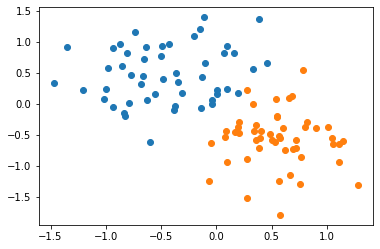

In [5]:
scatter_plot()

# Perceptron Model

In [6]:
# Initialize Linear Model
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        # here we use sigmoid function to change our output to probability
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [8]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
    return (w1.item(), w2.item(), b1.item())

In [9]:
def plot_fit(title):
    plt.title = title
#     0 = w1x1 + w2x2 +b
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1, x2, 'r')
    scatter_plot()

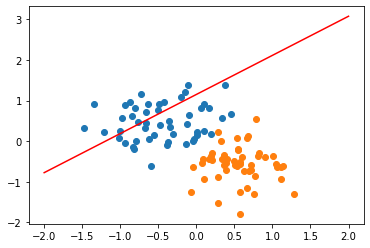

In [10]:
plot_fit('Initial Model')

# Model Training

In [11]:
# Cross Entropy
criterion = nn.BCELoss()
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("Epoch: ", i, "Loss: ", loss)
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:  0 Loss:  tensor(0.6185, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  1 Loss:  tensor(0.6175, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  2 Loss:  tensor(0.6164, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  3 Loss:  tensor(0.6154, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  4 Loss:  tensor(0.6143, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  5 Loss:  tensor(0.6133, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  6 Loss:  tensor(0.6123, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  7 Loss:  tensor(0.6113, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  8 Loss:  tensor(0.6102, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  9 Loss:  tensor(0.6092, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  10 Loss:  tensor(0.6082, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  11 Loss:  tensor(0.6072, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  12 Loss:  tensor(0.6062, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  13 Loss:  tensor(0.6052, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  14 Loss:

Epoch:  204 Loss:  tensor(0.4612, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  205 Loss:  tensor(0.4606, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  206 Loss:  tensor(0.4601, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  207 Loss:  tensor(0.4595, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  208 Loss:  tensor(0.4590, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  209 Loss:  tensor(0.4584, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  210 Loss:  tensor(0.4579, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  211 Loss:  tensor(0.4573, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  212 Loss:  tensor(0.4568, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  213 Loss:  tensor(0.4562, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  214 Loss:  tensor(0.4557, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  215 Loss:  tensor(0.4551, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  216 Loss:  tensor(0.4546, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  217 Loss:  tensor(0.4541, grad_fn=<BinaryCrossEntropyBac

Epoch:  435 Loss:  tensor(0.3646, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  436 Loss:  tensor(0.3643, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  437 Loss:  tensor(0.3639, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  438 Loss:  tensor(0.3636, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  439 Loss:  tensor(0.3633, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  440 Loss:  tensor(0.3630, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  441 Loss:  tensor(0.3627, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  442 Loss:  tensor(0.3624, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  443 Loss:  tensor(0.3621, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  444 Loss:  tensor(0.3618, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  445 Loss:  tensor(0.3615, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  446 Loss:  tensor(0.3612, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  447 Loss:  tensor(0.3609, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  448 Loss:  tensor(0.3606, grad_fn=<BinaryCrossEntropyBac

Epoch:  676 Loss:  tensor(0.3052, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  677 Loss:  tensor(0.3050, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  678 Loss:  tensor(0.3048, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  679 Loss:  tensor(0.3046, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  680 Loss:  tensor(0.3044, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  681 Loss:  tensor(0.3042, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  682 Loss:  tensor(0.3040, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  683 Loss:  tensor(0.3038, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  684 Loss:  tensor(0.3037, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  685 Loss:  tensor(0.3035, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  686 Loss:  tensor(0.3033, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  687 Loss:  tensor(0.3031, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  688 Loss:  tensor(0.3029, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  689 Loss:  tensor(0.3027, grad_fn=<BinaryCrossEntropyBac

Epoch:  916 Loss:  tensor(0.2666, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  917 Loss:  tensor(0.2665, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  918 Loss:  tensor(0.2663, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  919 Loss:  tensor(0.2662, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  920 Loss:  tensor(0.2661, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  921 Loss:  tensor(0.2659, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  922 Loss:  tensor(0.2658, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  923 Loss:  tensor(0.2657, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  924 Loss:  tensor(0.2655, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  925 Loss:  tensor(0.2654, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  926 Loss:  tensor(0.2653, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  927 Loss:  tensor(0.2651, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  928 Loss:  tensor(0.2650, grad_fn=<BinaryCrossEntropyBackward>)
Epoch:  929 Loss:  tensor(0.2649, grad_fn=<BinaryCrossEntropyBac

Text(0.5, 0, 'Epoch')

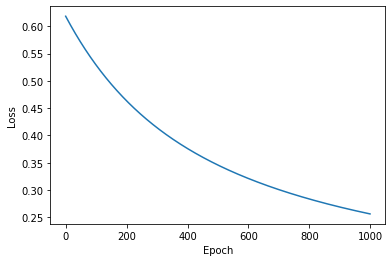

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

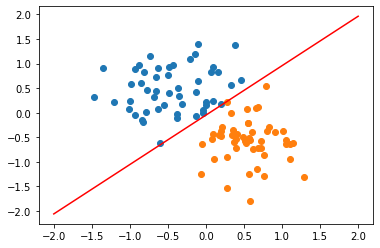

In [14]:
plot_fit('Trained Model')

# Model Testing

Red point in class 1
Black point in class 0
Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142


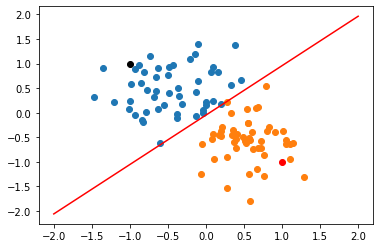

In [16]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))

plot_fit("Trained Model")